# TCLab Overview

The `tclab` package provides a set of Python tools for interfacing with the [BYU Temperature Control Laboratory](http://apmonitor.com/pdc/index.php/Main/ArduinoTemperatureControl). The Temperature Control Laboratory consists of two heaters and two temperature sensors mounted on an Arduino microcontroller board. Together, the `tclab` package and the Temperature Control Laboratory provide a low-cost experimental platform for implementing algorithms commonly used for process control.

![](images/tclab_device.png) 

## TCLab Architecture

The `tclab` package is intended to be used as a teaching tool. The package provides high-level access to sensors, heaters, a pseudo-realtime clock. The package includes the following Python classes and functions:

* `TCLab()` providing access to the Temperature Control Laboratory hardware.
* `TCLabModel()` providing access to a simulation of the Temperature Control Laboratory hardware. 
* `clock` for synchronizing with a real time clock.
* `Historian` for data logging.
* `Plotter` for realtime plotting.

![](images/TCLabOverview.png)

Using these Python tools, students can create Jupyter notebooks and python codes covering a wide range of topics in process control.

* **tclab.py:** A Python package providing high-level access to sensors, heaters, a pseudo-realtime clock. The package includes `TCLab()` providing access to the device, `clock` for synchronizing with a real time clock, `Historian` for data logging, and `Plotter` for realtime plotting.

* **TCLab-sketch.ino:** Firmware for the intrisically safe operation of the Arduino board and shield. The sketch is available at [https://github.com/jckantor/TCLab-sketch](https://github.com/jckantor/TCLab-sketch).

* **Arduino:** Hardware platform for the Temperature Control Laboratory. TCLab is compatiable with Arduino Uno, Arduino Leonardo, and compatible clones.

## Getting Started

### Installation

Install using

    pip install tclab
   
To upgrade an existing installation, use the command

    pip install tclab --upgrade

### Hardware Setup

1. Plug a compatible Arduino device (UNO, Leonardo, NHduino) with the
   lab attached into your computer via the USB connection. Plug the DC
   power adapter into the wall.

2. (optional) Install Arduino Drivers.

   *If you are using Windows 10, the Arduino board should connect
   without additional drivers required.*

   Mac OS X users may need to install a serial driver. For Arduino clones using the CH340G, CH34G or CH34X chipset, a suitable driver can be found at [https://github.com/MPParsley/ch340g-ch34g-ch34x-mac-os-x-driver]() or [https://github.com/adrianmihalko/ch340g-ch34g-ch34x-mac-os-x-driver]().

3. (optional) Install Arduino Firmware;

   `TCLab` requires the one-time installation of custom firmware on an Arduino device. If it hasn't been pre-installed, the necessary firmware and instructions are available from the [TCLab-Sketch repository](https://github.com/jckantor/TCLab-sketch).

### Checking Everything Works

Execute the following code

    import tclab
    tclab.TCLab().T1

If everything has worked, you should see the following output message

    Connecting to TCLab
    TCLab Firmware Version 1.2.1 on NHduino connected to port XXXX
    21.54

The number returned is the temperature of sensor T1 in °C.

## Next Steps

The notebook directory provides examples on how to use the TCLab module.

### Course Web Sites

More information, instructional videos, and Jupyter notebook
examples are available at the following course websites.

* Arduino temperature control lab page [http://apmonitor.com/pdc/index.php/Main/ArduinoTemperatureControl]() on the BYU Process Dynamics and Control course website.
* [CBE 30338 <http://jckantor.github.io/CBE30338/]() for the Notre Dame
  Chemical Process Control course website.

# Connecting to the Temperature Control Laboratory

## Importing

Once installed the package can be imported into Python and an instance created with the Python statements

    from tclab import TCLab
    a = TCLab()

TCLab() attempts to find a device connected to a serial port and returns a connection. An error is generated if no device is found.  The connection should be closed with

    a.close()
    
when no longer in use. The following cell demonstrates this process, and uses the tclab `LED()` function to flash the LED on the Temperature Control Lab for a period of 10 seconds at a 100% brightness level. 

In [1]:
from tclab import TCLab, clock

a = TCLab()
a.LED(100)
a.close()

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Using TCLab with Python's `with` statement

The Python `with` statement provides a simple means of setting up and closing a connection to the Temperature Control Laboratory. The with statement establishes a context where a tclab instance is created, assigned to a variable, and automatically closed upon completion.

In [2]:
from tclab import TCLab

with TCLab() as a:
    a.LED(100)

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
TCLab disconnected successfully.


The `with` statement is likely to be the most common way to connect the Temperature Control Laboratory for most uses.

## Reading Temperatures

Once a tclab instance is created and connected to a device, the temperature sensors on the temperature control lab can be acccessed with the attributes `.T1` and `.T2`.  For example, given an instance `a`, the temperatures are accessed as

    T1 = a.T1
    T2 = a.T2

Note that `a.T1` and `a.T2` are read-only properties. Any attempt to set them to a value will return a Python error.

In [3]:
from tclab import TCLab

with TCLab() as a:
    print("Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Temperature 2: {0:0.2f} °C".format(a.T2))

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Temperature 1: 23.16 °C
Temperature 2: 22.20 °C
TCLab disconnected successfully.


## Setting Heaters

The heaters are controlled by functions`.Q1()` and `.Q2()` of a tclab instance. For example, both heaters can be set to 100% power with the functions

    a.Q1(100)
    a.Q2(100)

The device firmware limits the heaters to a range of 0 to 100%. The current value of attributes may be accessed via

    Q1 = a.Q1()
    Q2 = a.Q2()
    
Note that the retrieved values may be different due to the range-limiting enforced by the device firmware.

In [4]:
from tclab import TCLab
import time

with TCLab() as a:
    print("\nStarting Temperature 1: {0:0.2f} °C".format(a.T1),flush=True)
    print("Starting Temperature 2: {0:0.2f} °C".format(a.T2),flush=True)

    a.Q1(100)
    a.Q2(100)
    print("\nSet Heater 1:", a.Q1(), "%",flush=True)
    print("Set Heater 2:", a.Q2(), "%",flush=True)
    
    t_heat = 30
    print("\nHeat for", t_heat, "seconds")
    time.sleep(t_heat)

    print("\nTurn Heaters Off")
    a.Q1(0)
    a.Q2(0)
    print("\nSet Heater 1:", a.Q1(), "%",flush=True)
    print("Set Heater 2:", a.Q2(), "%",flush=True)
    
    print("\nFinal Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Final Temperature 2: {0:0.2f} °C".format(a.T2))

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.

Starting Temperature 1: 23.16 °C
Starting Temperature 2: 22.20 °C

Set Heater 1: 100.0 %
Set Heater 2: 100.0 %

Heat for 30 seconds

Turn Heaters Off

Set Heater 1: 0.0 %
Set Heater 2: 0.0 %

Final Temperature 1: 28.96 °C
Final Temperature 2: 25.10 °C
TCLab disconnected successfully.


## Synchronizing with Real Time with `clock()`

The tclab module includes a function `clock` for synchronizing calculations with real time.  `clock(tperiod)` is an iterator that generates a sequence of equally spaced time steps from zero to `tperiod`  separated by one second intervals. For each step `clock` returns time since start rounded to the nearest 10th of a second.

In [5]:
from tclab import clock

tperiod = 5
for t in clock(tperiod):
    print(t, "sec.")

0 sec.
1.0 sec.
2.0 sec.
3.0 sec.
4.0 sec.
5.0 sec.


An optional parameter `tstep` specifies a time step different from one second.

In [6]:
from tclab import clock

tperiod = 5
tstep = 2.5
for t in clock(tperiod,tstep):
    print(t, "sec.")

0 sec.
2.5 sec.
5.0 sec.


There are some considerations when using `clock`. First, by its nature Python is not a real-time environment. `clock` makes a best effort to stay in sync with the wall clock, but there can be no guarantees. The default behavior of `clock` is to maintain long-term synchronization with the real time clock. A `RuntimeError` is raised if the difference between clock time and real time is greater than the optional parameter `tol` (default value of 0.25) 

In [7]:
from tclab import clock

import time

tfinal = 5
tstep = 1
for t in clock(tfinal, tstep, tol=0.5):
    print(t, "sec.")
    if 0.5 < t < 2.5:
        time.sleep(1.2)

0 sec.
1.0 sec.
2.2 sec.
3.4 sec.
4.0 sec.
5.0 sec.


### Using `clock` with TCLab

In [8]:
from tclab import TCLab, clock

tperiod = 20

# connect to the temperature control lab
with TCLab() as a:
    # turn heaters on
    a.Q1(100)
    a.Q2(100)
    print("\nSet Heater 1 to {0:f} %".format(a.Q1()))
    print("Set Heater 2 to {0:f} %".format(a.Q2()))

    # report temperatures for the next tperiod seconds
    sfmt = "   {0:5.1f} sec:   T1 = {1:0.1f} °C    T2 = {2:0.1f} °C"
    for t in clock(tperiod, 2):
        print(sfmt.format(t, a.T1, a.T2), flush=True)
        

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.

Set Heater 1 to 100.000000 %
Set Heater 2 to 100.000000 %
     0.0 sec:   T1 = 32.8 °C    T2 = 28.6 °C
     2.0 sec:   T1 = 32.8 °C    T2 = 27.7 °C
     4.0 sec:   T1 = 33.1 °C    T2 = 27.7 °C
     6.0 sec:   T1 = 33.1 °C    T2 = 28.0 °C
     8.0 sec:   T1 = 33.5 °C    T2 = 28.0 °C
    10.0 sec:   T1 = 33.8 °C    T2 = 28.3 °C
    12.0 sec:   T1 = 34.1 °C    T2 = 28.3 °C
    14.0 sec:   T1 = 34.4 °C    T2 = 29.6 °C
    16.0 sec:   T1 = 34.8 °C    T2 = 29.9 °C
    18.0 sec:   T1 = 35.4 °C    T2 = 30.2 °C
    20.0 sec:   T1 = 35.7 °C    T2 = 29.3 °C
TCLab disconnected successfully.


## Setting Maximum Heater Power

Heater power is normally set with `Q1` and `Q2` by specifying a value in a range from 0 to 100% of maximum heater power.  The values of maximum heater power, in turn, are specified in firmware in units of pulse-width-modulation (pwm) that range from 0 to 255. The default values are 200 for heater 1 and 100 for heater 2. 

The maximum heater power can be retrieved and set by properties `P1` and `P2`. The following code sets both heaters to maximum power of pwm = 100.

In [9]:
from tclab import TCLab

with TCLab() as a:
    print("Maximum power of heater 1 = ", a.P1)
    print("Maximum power of heater 2 = ", a.P2)
    
    print("Adjusting the maximum power of heater 1.")
    a.P1 = 100
    
    print("Maximum power of heater 1 = ", a.P1)
    print("Maximum power of heater 2 = ", a.P2)

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Maximum power of heater 1 =  200.0
Maximum power of heater 2 =  100.0
Adjusting the maximum power of heater 1.
Maximum power of heater 1 =  100.0
Maximum power of heater 2 =  100.0
TCLab disconnected successfully.


The maximum power applied to the heaters is a function of both the settings (`P1`,`P2`) and of the power supply used with the TCLab hardware. The TCLab hardware is normally used with a 5 watt USB power supply capable of supply up to 1 amp at 5 volts. 

The TCLab hardware actually draws more than 1 amp when both `P1` and `P2` are set to 255 and `Q1` and `Q2` are at 100%. This situation will overload the power supply and result in the power supply shutting down. Normally the power supply will reset itself after unplugging from the power mains.

Experience with the device shows keeping the sum `P1` and `P2` to a value less than 300 will avoid problems with the 5 watt power supply. If you have access to larger power supplies, then you can adjust `P1` and `P2` accordingly to achieve a wider range of temperatures.

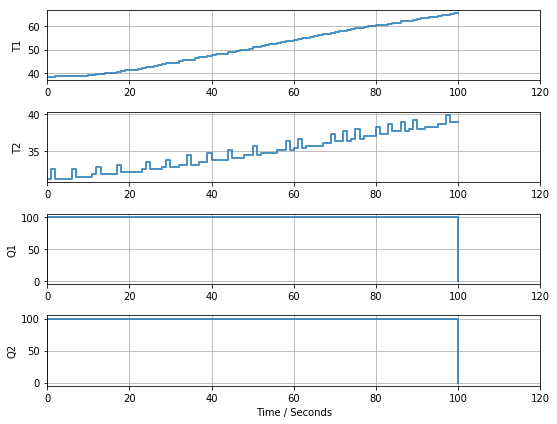

TCLab disconnected successfully.


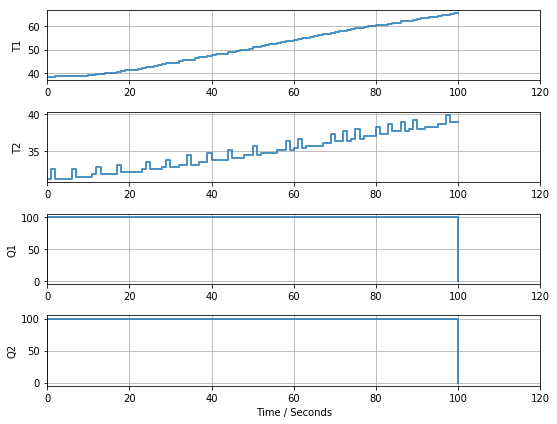

In [10]:
%matplotlib inline
from tclab import TCLab, clock, Historian, Plotter

with TCLab() as a:
    a.P1 = 250
    a.P2 = 50
    h = Historian(a.sources)
    p = Plotter(h)
    for t in clock(100):
        a.Q1(100 if t < 100 else 0)
        a.Q2(100 if t < 100 else 0)
        p.update(t)

# The TCLab `Historian`

## Basic logging

The `Historian` class provides data logging. Given an instance of a TCLab object, an Historian is created with the command

    h = Historian(a.sources)
    
The historian initializes a data log. The data log is updated by issuing a command

    h.update(t)
    
Where `t` is the current clock time. If `t` is omitted, the historian will calculate its own time.

In [1]:
from tclab import TCLab, clock, Historian

with TCLab() as a:
    h = Historian(a.sources)
    for t in clock(20):
        a.Q1(100 if t <= 10 else 0)
        print("Time:", t, 'seconds')
        h.update(t)        

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Time: 0 seconds
Time: 1.0 seconds
Time: 2.0 seconds
Time: 3.0 seconds
Time: 4.0 seconds
Time: 5.0 seconds
Time: 6.0 seconds
Time: 7.0 seconds
Time: 8.0 seconds
Time: 9.0 seconds
Time: 10.0 seconds
Time: 11.0 seconds
Time: 12.0 seconds
Time: 13.0 seconds
Time: 14.0 seconds
Time: 15.0 seconds
Time: 16.0 seconds
Time: 17.0 seconds
Time: 18.0 seconds
Time: 19.0 seconds
Time: 20.0 seconds
TCLab disconnected successfully.


### Accessing the Data Log from the Historian

`Historian` maintains a data log that is updated on each encounter of the `.update()` function. Individual time series are available as elements of `Historian.fields`:

    t, T1, T2, Q1, Q2 = h.fields 

For example, here's how to plot the history of temperature T1 versus time from the example above.

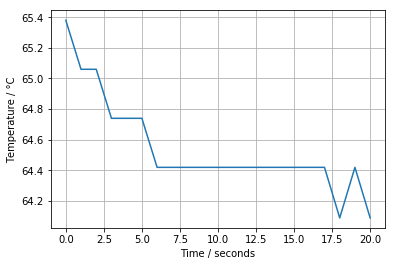

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

t, T1, T2, Q1, Q2 = h.fields 
plt.plot(t, T1)
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.grid()

The entire data history is available from the historian as the attribute `.log`. Here we show the first three rows from the log:

In [3]:
h.log[:3]

[(0, 65.38, 40.24, 0.0, 0.0),
 (0, 65.38, 40.24, 100.0, 0.0),
 (1.0, 65.06, 40.24, 100.0, 0.0)]

A sample code demonstrating how to plot the historian log.

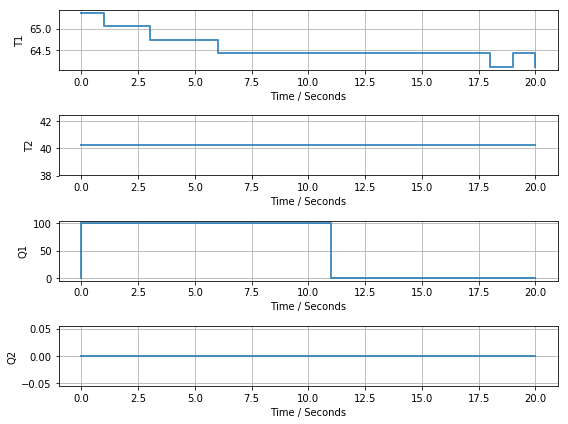

In [4]:
def plotlog(historian):
    line_options = {'lw': 2, 'alpha': 0.8}
    fig = plt.figure(figsize=(8, 6))
    nplots = len(h.columns) - 1
    t = historian.fields[0]
    for n in range(1, nplots+1):
        plt.subplot(nplots,1,n)
        y = historian.fields[n]
        plt.step(t, y, where='post', **line_options)          
        plt.grid()
        plt.xlabel('Time / Seconds')
        plt.ylabel(historian.columns[n])
    plt.tight_layout()
    
plotlog(h)

### Accessing log data via Pandas

Here's an example of how the log can be converted to a Pandas dataframe.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
df.head()

,T1,T2,Q1,Q2
Time,,,,
0.0,65.38,40.24,0.0,0.0
0.0,65.38,40.24,100.0,0.0
1.0,65.06,40.24,100.0,0.0
2.0,65.06,40.24,100.0,0.0
3.0,64.74,40.24,100.0,0.0


The following cells provide examples of plots that can be constructed once the data log has been converted to a pandas dataframe.

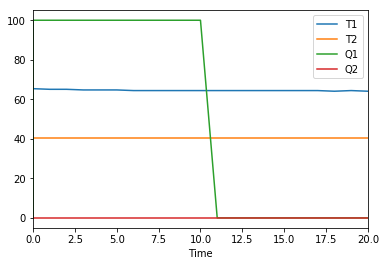

In [6]:
df.plot()

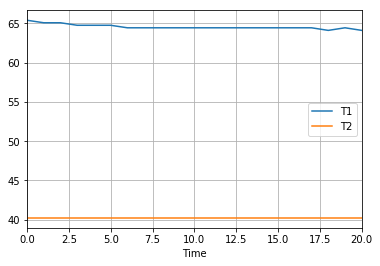

In [7]:
df[['T1','T2']].plot(grid=True)

# The TCLab Plotter

When operating in a Jupyter Notebook, a `Plotter` can be used together with the `Historian`.  

    h = Historian(a)
    p = Plotter(h, tfinal)
    
where `a` is a `TCLab` instance as before and the optional parameter `tfinal` provides an initial scaling of the time axes. Each call to `p.update()` will automatically update both the historian and the plot.

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


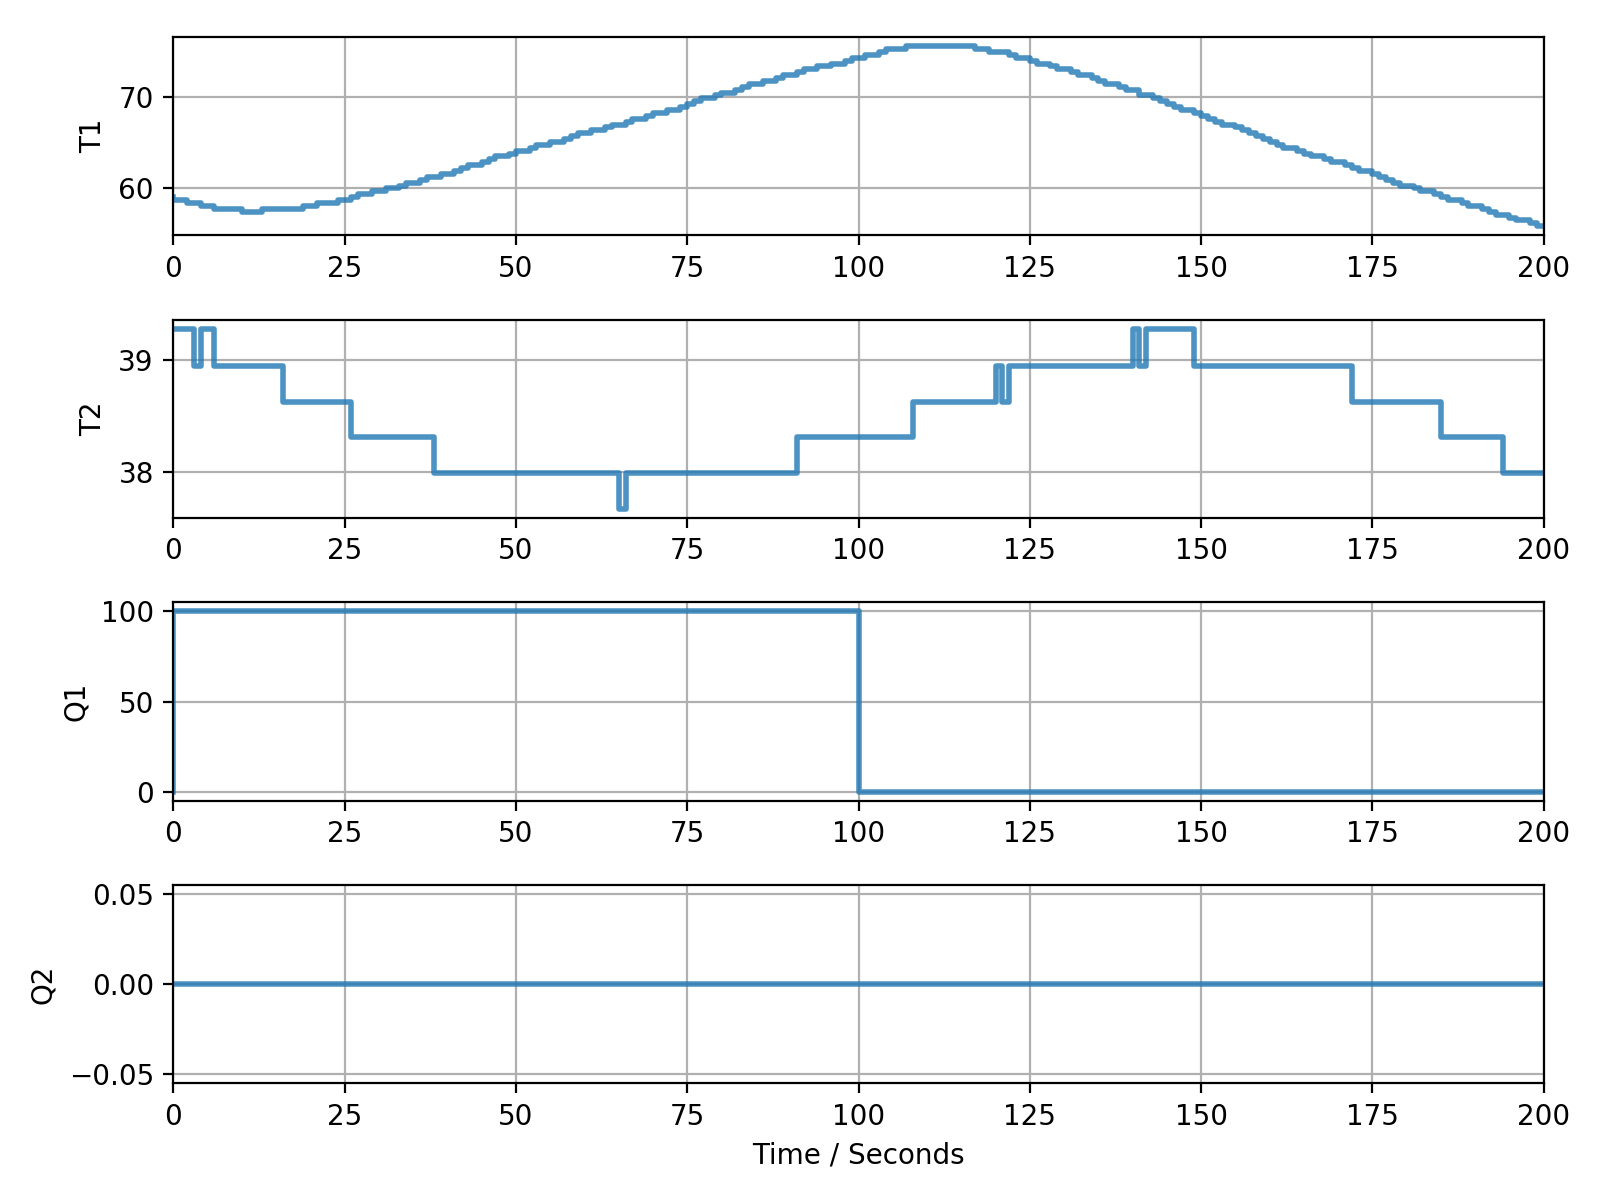

TCLab disconnected successfully.


In [1]:
%matplotlib notebook
from tclab import TCLab, clock, Historian, Plotter

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        p.update(t)

# Working with TCLab in Simulation Mode

TCLab Model

`TCLabModel` replaces `TCLab` for occasions where the TCLab hardware might not be available. To use, include the import

    from tclab import TCLabModel as TCLab 
    
The rest of your code will work without change. Be advised the underlying model used to approximate the behavior of the Temperature Control Laboratory is an approximation to the dynamics of the actual hardware.

In [1]:
from tclab import TCLabModel as TCLab

with TCLab() as a:
    print("Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Temperature 2: {0:0.2f} °C".format(a.T2))

Simulated TCLab
Temperature 1: 21.02 °C
Temperature 2: 21.11 °C
TCLab Model disconnected successfully.


As an additional example.

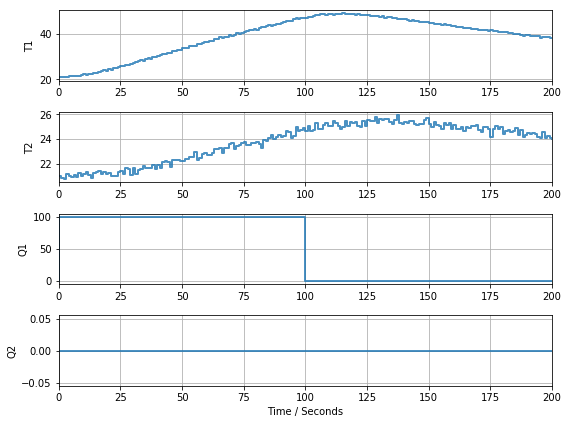

TCLab Model disconnected successfully.


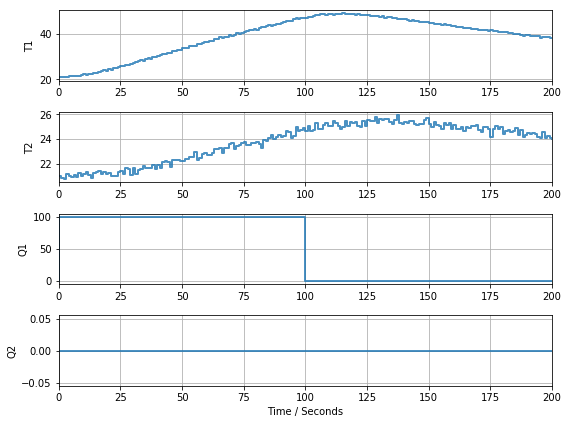

In [2]:
%matplotlib inline
from tclab import TCLabModel as TCLab
from tclab import clock, Historian, Plotter

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        p.update(t)

### Speedup Factor with `setup()`

The setup function provides control over the use of the TCLab hardware or model. If using a model, an option to run at a multiple of real-time.

A speedup of 10 or greater causes the simulation to run as fast as possible.

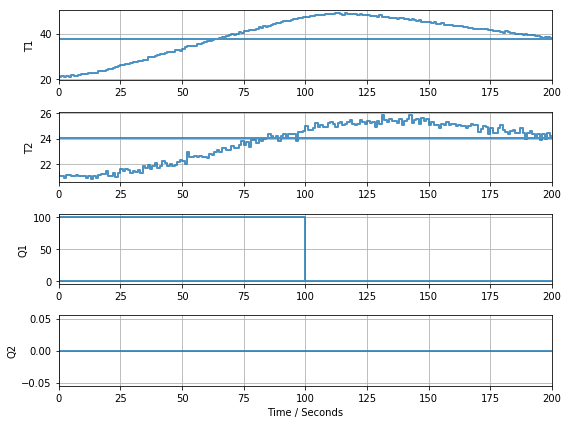

TCLab Model disconnected successfully.


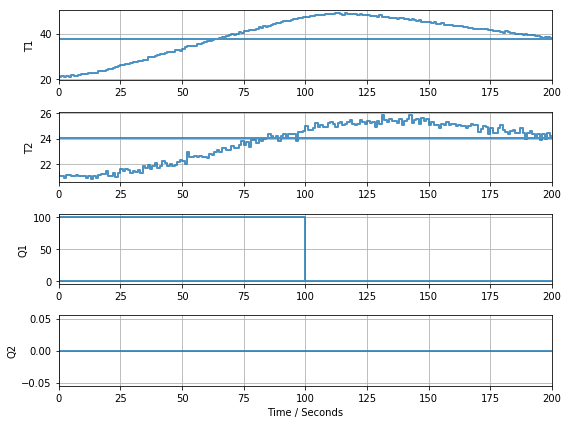

In [3]:
%matplotlib inline
from tclab import clock, Historian, Plotter, setup

TCLab = setup(connected=False, speedup=20)

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        h.update(t)
    p.update()

# Graphical interaction with the Temperature Control Laboratory
The `tclab.gui` module supplies a graphical interface to the Temperature Control Laboratory.

In [1]:
from tclab.gui import NotebookUI

In [2]:
%matplotlib notebook

In [ ]:
interface = NotebookUI()

In [ ]:
interface.gui

## Accessing past sessions
Once you have finished the experiment, you can see what sessions the historian stored as follows:

In [ ]:
interface.historian.get_sessions()

The historian can load data from one of the previous sessions. Note that this will overwrite the data currently stored in the historian.

In [ ]:
interface.historian.load_session(1)

Once the data have been loaded, the historian will support all the same commands as if only one session was used.

In [ ]:
interface.historian.log

## Non-blocking Operation

In [ ]:
import threading, time

next_call = time.time()

def foo():
  global next_call
  print(datetime.datetime.now())
  next_call = next_call+1
  threading.Timer( next_call - time.time(), foo ).start()

#foo()

def bar():
    clock.send(None)

def clock(tperiod):
    tstart = time.time()
    tfinish = tstart + tperiod
    t = 0
    while t + tstart < tfinish:
        z = yield t
        t += 1

def bar():
    clock.send(2)

## Graphics Testing

Notebook to test graphics during development.

In [ ]:
%matplotlib notebook
from tclab import setup
from tclab import Historian, Plotter, clock
import time

tic = time.time()
lab = setup(connected=False, speedup=10)
with lab() as a:
    h = Historian(a.sources)
    p = Plotter(h, 200, layout=(('T1', 'T2'), ('Q1', 'Q2')))
    for t in clock(200):
        a.U1 = 80
        p.update(t)
toc = time.time()

print(toc-tic, 'seconds')

In [ ]:
from tclab import TCLabModel,  Historian, Plotter
import threading, time

tstep = 1
tperiod = 20

tstart = time.time()
tfinish = tstart + tperiod
tnext = tstart

a = TCLabModel()
h = Historian(a.sources)
p = Plotter(h,20)
a.U1 = 100


def tasks(tnext):
    global tnext, tfinish, tstep
    p.update(tnext-tstart)
    tnext = tnext + tstep
    if tnext <= tfinish:
        threading.Timer(tnext-time.time(), update).start()
    else:
        a.close()

update()

In [ ]:
%matplotlib notebook

import time
from threading import Timer
from tclab import setup, Historian, Plotter

lab = setup(connected=False, speedup=1)
a = lab()
h = Historian(a.sources)
p = Plotter(h)

SP = 40

tstart = time.time()
def loop():
    PV = a.T1
    MV = 100 if PV < SP else 0
    a.U1 = MV
    p.update(time.time()-tstart)

for t in range(0,100):
    Timer(t, loop).start()
Timer(100,a.close).start()

In [ ]:
SP = 20

In [ ]:
import threading, time, datetime

def loop():
    yield
    print(datetime.datetime.now())
    threading.Timer(1000, lambda: next(loop_gen)).start()
    
loop_gen = loop()
next(loop_gen)


In [ ]:
import asyncio

async def slow_op(n):
    await asyncio.sleep(n)
    print("Slow Op:", n)
    
async def main():
    await asyncio.wait([slow_op(3),slow_op(2),slow_op(1)])
    
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

## Testing

## Temperature Sampling Speed

In [ ]:
import time
from tclab import setup, clock

lab = setup(connected=True)

N = 100
meas = []
with lab() as a:
    tic = time.time()
    for k in range(0,N):
        meas.append(a.T1)
    toc = time.time()

print('Reading temperature at', round(N/(toc-tic),1), 'samples per second.')

## Heater Sampling Speed

In [ ]:
import time
from tclab import setup, clock

lab = setup(connected=True)

N = 100
meas = []
with lab() as a:
    tic = time.time()
    for k in range(0,N):
        a.Q1(100)
    toc = time.time()

print('Setting heater at', round(N/(toc-tic),1), 'samples per second.')

In [ ]:
import time
from tclab import setup, clock

lab = setup(connected=True)

N = 100
meas = []
with lab() as a:
    tic = time.time()
    for k in range(0,N):
        meas.append(a.scan())
    toc = time.time()

print('Reading temperature at', round(N/(toc-tic),1), 'samples per second.')

## Working with Tornado

This is an experiment to build a non-blocking event loop for TCLab.  The main idea is to implement the main event loop as a generator, then use Tornando's non-blocking timer to send periodic messages to the generator.

In [ ]:
%matplotlib inline
import tornado
import time
from tclab import setup, Historian, Plotter

SP = 40
Kp = 10

def update(lab):
    t = 0
    h = Historian(lab.sources)
    p = Plotter(h,120)
    while True:
        PV = lab.T1
        MV = Kp*(SP-PV)
        lab.U1 = MV
        p.update(t)
        yield
        t += 1

lab = setup(connected=True)
a = lab()
update_gen = update(a)
timer = tornado.ioloop.PeriodicCallback(lambda: next(update_gen), 1000)
timer.start()

In [ ]:
timer.stop()
a.close()

## Working with Widgets

`tclab.clock` is based on a generator, which maintains a single thread of execution. One consequence is that there is no interaction with Jupyter widgets.

In [ ]:
from ipywidgets import interactive
from IPython.display import display
from tclab import clock

Kp = interactive(lambda Kp: Kp, Kp = 12)
display(Kp)

for t in clock(10):
    print(t, Kp.result)

In [ ]:
import tornado
from ipywidgets import interactive
from IPython.display import display
from tclab import TCLab, Historian, Plotter

Kp = interactive(lambda Kp: Kp, Kp = (0,20))
SP = interactive(lambda SP: SP, SP = (25,55))
SP.layout.height = '500px'

def update(tperiod):
    t = 0
    with TCLab() as a:
        h = Historian(a.sources)
        p = Plotter(h)
        while t <= tperiod:
            yield
            p.update(t)
            display(Kp)
            display(SP)
            a.U1 = SP.result
            t += 1
        timer.stop()

update_gen = update(20)
timer = tornado.ioloop.PeriodicCallback(lambda: next(update_gen), 1000)
timer.start()

In [ ]:
from ipywidgets import interactive
from tclab import setup, clock, Historian, Plotter

def proportional(Kp):
    MV = 0
    while True:
        PV, SP = yield MV
        MV = Kp*(SP-PV)

def sim(Kp=1, SP=40):
    controller = proportional(Kp)
    controller.send(None)

    lab = setup(connected=False, speedup=20)
    with lab() as a:
        h = Historian(a.sources)
        p = Plotter(h,200)
        for t in clock(200):
            PV = a.T1
            MV = controller.send([PV,SP])
            a.U1 = MV
            h.update()
        p.update()   

interactive_plot = interactive(sim, Kp=(0,20,1), SP=(25,60,5), continuous_update=False);
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

In [ ]:
timer.stop()